In [152]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Import scikit learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [153]:
data = pd.read_csv('data_cleaned.csv')

In [154]:
#Overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21597 non-null  int64  
 1   date                21597 non-null  object 
 2   price               21597 non-null  float64
 3   bedrooms            21597 non-null  int64  
 4   bathrooms           21597 non-null  float64
 5   sqft_living         21597 non-null  int64  
 6   sqft_lot            21597 non-null  int64  
 7   floors              21597 non-null  float64
 8   waterfront          21597 non-null  float64
 9   view                21597 non-null  float64
 10  condition           21597 non-null  int64  
 11  grade               21597 non-null  int64  
 12  sqft_above          21597 non-null  int64  
 13  sqft_basement       21597 non-null  float64
 14  yr_built            21597 non-null  int64  
 15  yr_renovated        21597 non-null  int64  
 16  zipc

## V first shitty model

In [155]:
feats_in_control = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'grade_category',
                    'sqft_above', 'sqft_basement', 'has_been_viewed', 'has_basement', 'has_been_renovated']

In [156]:
# Define X and y
X_cols = [c for c in data[feats_in_control].columns.to_list() if c not in ['price', 'grade_category']] 
#take out categoricals - aka grade_category

X = data[X_cols]
y = data['price']

In [157]:
model = sm.OLS(y, sm.add_constant(X))

In [158]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.657e+05   3.55e+04    -21.589      0.000   -8.35e+05   -6.96e+05
bedrooms           -4.305e+04   2246.246    -19.164      0.000   -4.75e+04   -3.86e+04
bathrooms          -2.123e+04   3678.188     -5.771      0.000   -2.84e+04    -1.4e+04
sqft_living          169.5554     25.379      6.681      0.000     119.810     219.301
floors              2208.1053   4109.824      0.537      0.591   -5847.454    1.03e+04
condition           6.259e+04   2655.114     23.572      0.000    5.74e+04    6.78e+04
grade               1.124e+05   2375.633     47.296      0.000    1.08e+05    1.17e+05
sqft_above            31.0099     25.367      1.222      0.222     -18.711      80.730
sqft_basement         66.1367     25.991      2.545      0.011      15.193     117.081
has_been_viewed     -2.42e+04   3.04e+04     -0.795      0.427   -8.39e+04    3.55e+04
has_basement        2.388e+04   6137.512      3.891      0.000    1.19e+04    3.59e+04
has_been_renovated  1.866e+05   9047.855     20.620      0.000    1.69e+05    2.04e+05
==============================================================================
Omnibus:                    16818.210   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004862.557
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                     8.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Learning: p values show floors, sqft_above, and has_been_viewed not significant

## Now with Scaler

In [159]:
# Instantiate a scaler and scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [160]:
# New model on scaled data
scaled_model = sm.OLS(y, sm.add_constant(X_scaled))

In [161]:
# Look at our results
scaled_results = scaled_model.fit()

scaled_results.summary()
# same r-squared and p-values, look at coefficients to see how they impact y
# 1 scaled unit if [feature] increases/decreases price by coef #
# sqft_living and grade big drivers of price

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1640.951    329.258      0.000    5.37e+05    5.44e+05
x1         -3.987e+04   2080.647    -19.164      0.000    -4.4e+04   -3.58e+04
x2         -1.632e+04   2828.403     -5.771      0.000   -2.19e+04   -1.08e+04
x3          1.557e+05   2.33e+04      6.681      0.000     1.1e+05    2.01e+05
x4          1191.6489   2217.950      0.537      0.591   -3155.697    5538.995
x5          4.071e+04   1727.233     23.572      0.000    3.73e+04    4.41e+04
x6          1.318e+05   2787.027     47.296      0.000    1.26e+05    1.37e+05
x7          2.567e+04    2.1e+04      1.222      0.222   -1.55e+04    6.68e+04
x8          2.896e+04   1.14e+04      2.545      0.011    6651.599    5.13e+04
x9         -1305.2979   1641.465     -0.795      0.427   -4522.691    1912.095
x10         1.162e+04   2986.629      3.891      0.000    5767.705    1.75e+04
x11         3.403e+04   1650.148     20.620      0.000    3.08e+04    3.73e+04
==============================================================================
Omnibus:                    16818.210   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004862.557
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
# Compare to original 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2594.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.657e+05   3.55e+04    -21.589      0.000   -8.35e+05   -6.96e+05
bedrooms           -4.305e+04   2246.246    -19.164      0.000   -4.75e+04   -3.86e+04
bathrooms          -2.123e+04   3678.188     -5.771      0.000   -2.84e+04    -1.4e+04
sqft_living          169.5554     25.379      6.681      0.000     119.810     219.301
floors              2208.1053   4109.824      0.537      0.591   -5847.454    1.03e+04
condition           6.259e+04   2655.114     23.572      0.000    5.74e+04    6.78e+04
grade               1.124e+05   2375.633     47.296      0.000    1.08e+05    1.17e+05
sqft_above            31.0099     25.367      1.222      0.222     -18.711      80.730
sqft_basement         66.1367     25.991      2.545      0.011      15.193     117.081
has_been_viewed     -2.42e+04   3.04e+04     -0.795      0.427   -8.39e+04    3.55e+04
has_basement        2.388e+04   6137.512      3.891      0.000    1.19e+04    3.59e+04
has_been_renovated  1.866e+05   9047.855     20.620      0.000    1.69e+05    2.04e+05
==============================================================================
Omnibus:                    16818.210   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004862.557
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      35.776   Cond. No.                     8.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now with Train-Test-Split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
# Instantiate a new scaler to scale our data
# Let's use Standard Scaler here
scaler = StandardScaler()

In [165]:
# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
# Fit our scaler - ON THE TRAINING DATA!!
# Then transform both train and test 

scaler.fit(X_train) #fit on training data; learns mean and standard deviations of the columns that have been fit

#transform both
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Instantiate an sklearn linear model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [168]:
# Fit your model - ON THE TRAINING DATA!!

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [169]:
# Grab predictions for train and test set

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [170]:
# How'd we do?
from sklearn.metrics import r2_score

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_pred_train)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train)}") 
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_train, y_pred_train))}")#about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_pred_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_pred_test))}") #about X amount off in predicting price

Training Scores:
R2: 0.5588979162038594
Mean Absolute Error: 156710.2345290629
Root Mean Squared Error: 395.86643521402885
---
Testing Scores:
R2: 0.5890000675400974
Mean Absolute Error: 154858.12822655207
Root Mean Squared Error: 393.52017512009735


## Learning: Testing > Training, model is underfit
Only assess model on test score

# Now with Statsmodels - Reading p-values on train vs test what should guide something as not significant?

In [171]:
model = sm.OLS(y_test, sm.add_constant(X_test_scaled))

In [172]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     934.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:                -98349.
No. Observations:                7128   AIC:                         1.967e+05
Df Residuals:                    7116   BIC:                         1.968e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.361e+05   2820.821    190.034      0.000    5.31e+05    5.42e+05
x1         -4.598e+04   3838.123    -11.981      0.000   -5.35e+04   -3.85e+04
x2         -1.816e+04   4803.504     -3.780      0.000   -2.76e+04   -8741.124
x3          1.568e+05   3.88e+04      4.037      0.000    8.07e+04    2.33e+05
x4          3164.6748   3836.709      0.825      0.409   -4356.416    1.07e+04
x5          3.834e+04   3011.564     12.731      0.000    3.24e+04    4.42e+04
x6          1.293e+05   4789.765     27.002      0.000     1.2e+05    1.39e+05
x7          2.903e+04    3.5e+04      0.830      0.406   -3.95e+04    9.76e+04
x8          4.187e+04   1.89e+04      2.213      0.027    4786.362     7.9e+04
x9          1574.6832   2441.331      0.645      0.519   -3211.052    6360.419
x10         5698.9684   5049.418      1.129      0.259   -4199.393    1.56e+04
x11         3.687e+04   2838.486     12.991      0.000    3.13e+04    4.24e+04
==============================================================================
Omnibus:                     5376.706   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304486.360
Skew:                           3.088   Prob(JB):                         0.00
Kurtosis:                      34.418   Cond. No.                         39.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
model = sm.OLS(y_train, sm.add_constant(X_train_scaled))

In [174]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1665.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:            -1.9993e+05
No. Observations:               14469   AIC:                         3.999e+05
Df Residuals:                   14457   BIC:                         4.000e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.378e+05   2017.537    266.553      0.000    5.34e+05    5.42e+05
x1         -3.825e+04   2555.501    -14.968      0.000   -4.33e+04   -3.32e+04
x2          -1.55e+04   3500.220     -4.427      0.000   -2.24e+04   -8635.695
x3          1.554e+05   2.89e+04      5.374      0.000    9.87e+04    2.12e+05
x4           148.1664   2717.231      0.055      0.957   -5177.954    5474.286
x5          4.202e+04   2119.127     19.828      0.000    3.79e+04    4.62e+04
x6           1.32e+05   3399.488     38.815      0.000    1.25e+05    1.39e+05
x7          2.289e+04    2.6e+04      0.880      0.379   -2.81e+04    7.39e+04
x8          2.092e+04   1.41e+04      1.487      0.137   -6661.268    4.85e+04
x9         -3094.0688   2018.161     -1.533      0.125   -7049.924     861.786
x10         1.521e+04   3703.526      4.107      0.000    7951.790    2.25e+04
x11         3.265e+04   2029.178     16.089      0.000    2.87e+04    3.66e+04
==============================================================================
Omnibus:                    11425.291   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           684572.103
Skew:                           3.324   Prob(JB):                         0.00
Kurtosis:                      36.035   Cond. No.                         40.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding in OHE grade_category, no drop first

In [175]:
feats_in_control = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'grade_category',
                    'sqft_above', 'sqft_basement', 'has_been_viewed', 'has_basement', 'has_been_renovated']

In [176]:
data_feats_in_control = data[feats_in_control]

In [177]:
data_feats_in_control.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,grade_category,sqft_above,sqft_basement,has_been_viewed,has_basement,has_been_renovated
0,325000.0,4,2.50,2240,2.0,4,8,Average,2240,0.0,1,0,0
1,540000.0,3,1.75,1630,2.0,3,8,Average,1020,610.0,1,1,0
2,344000.0,1,1.50,760,3.0,3,8,Average,760,0.0,1,0,0
3,565000.0,4,2.50,2500,1.0,3,9,Average,2500,0.0,1,0,0
4,320000.0,3,2.00,1250,1.0,5,7,Average,1250,0.0,1,0,0


In [178]:
data_OHE = pd.get_dummies(data_feats_in_control, columns=['grade_category'])

In [179]:
data_OHE

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,has_been_viewed,has_basement,has_been_renovated,grade_category_Average,grade_category_High,grade_category_Low
0,325000.0,4,2.50,2240,2.0,4,8,2240,0.0,1,0,0,1,0,0
1,540000.0,3,1.75,1630,2.0,3,8,1020,610.0,1,1,0,1,0,0
2,344000.0,1,1.50,760,3.0,3,8,760,0.0,1,0,0,1,0,0
3,565000.0,4,2.50,2500,1.0,3,9,2500,0.0,1,0,0,1,0,0
4,320000.0,3,2.00,1250,1.0,5,7,1250,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,279000.0,3,1.00,1530,1.0,3,7,970,560.0,1,1,0,1,0,0
21593,456000.0,3,2.50,2130,2.0,3,8,2130,0.0,1,0,0,1,0,0
21594,280000.0,2,1.00,1260,1.0,3,6,1100,160.0,1,1,0,1,0,0
21595,359950.0,3,1.75,1570,1.0,3,7,1040,530.0,1,1,0,1,0,0


In [180]:
data_OHE.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'has_been_viewed',
       'has_basement', 'has_been_renovated', 'grade_category_Average',
       'grade_category_High', 'grade_category_Low'],
      dtype='object')

In [181]:
# Define X and y
X_cols = [c for c in data_OHE.columns.to_list() if c not in ['price']]

X = data_OHE[X_cols]
y = data_OHE['price']

In [182]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [183]:
# Instantiate a scaler
scaler = StandardScaler()

In [184]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
# Instantiate a linear regression model
lr = LinearRegression()

In [186]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [187]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_train, y_pred_train))}")#about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}")#about X amount off in predicting price
# Underfit testing > training

Training Scores:
R2: 0.5752643218837833
Mean Absolute Error: 152937.84549158774
Root Mean Squared Error: 395.86643521402885
---
Testing Scores:
R2: 0.6013935420406358
Mean Absolute Error: 151694.2141391869
Root Mean Squared Error: 389.4794142688249


## Learning: data_OHE  - r-squared up to .584 from .569 with grade_category OHE

## data_OHE2 = has_been_viewed and sqft_above p > 0.05, remove from model and try again

In [188]:
data_OHE2 = data_OHE.drop(labels=['has_been_viewed', 'sqft_above'], axis=1)

In [189]:
data_OHE2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_basement', 'has_basement', 'has_been_renovated',
       'grade_category_Average', 'grade_category_High', 'grade_category_Low'],
      dtype='object')

In [190]:
# Define X and y
X_cols = [c for c in data_OHE2.columns.to_list() if c not in ['price']]

X = data_OHE2[X_cols]
y = data_OHE2['price']

In [191]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [192]:
# Instantiate a scaler
scaler = StandardScaler()

In [193]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
# Instantiate a linear regression model
lr = LinearRegression()

In [195]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") 
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_train, y_train_pred))}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}") #about X amount off in predicting price
# Slightly Underfit

Training Scores:
R2: 0.5814533337071194
Mean Absolute Error: 151550.08946069193
Root Mean Squared Error: 389.29434809754423
---
Testing Scores:
R2: 0.5917873094757564
Mean Absolute Error: 156126.69621583796
Root Mean Squared Error: 395.1287084176977


In [197]:
data_OHE.corr().price.sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
grade_category_High       0.559649
bathrooms                 0.525906
sqft_basement             0.322192
bedrooms                  0.308787
floors                    0.256804
has_basement              0.178264
has_been_renovated        0.117543
condition                 0.036056
has_been_viewed          -0.012024
grade_category_Low       -0.090469
grade_category_Average   -0.486572
Name: price, dtype: float64

## Now try with statsmodels

In [198]:
model = sm.OLS(y, sm.add_constant(X))

In [199]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2759.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:            -2.9791e+05
No. Observations:               21597   AIC:                         5.958e+05
Df Residuals:                   21585   BIC:                         5.959e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.087e+05   1.54e+04    -26.546      0.000   -4.39e+05   -3.79e+05
bedrooms               -3.441e+04   2229.663    -15.431      0.000   -3.88e+04      -3e+04
bathrooms              -1.515e+04   3620.116     -4.185      0.000   -2.22e+04   -8052.966
sqft_living              176.0578      3.972     44.325      0.000     168.272     183.843
floors                  1.444e+04   4054.379      3.562      0.000    6496.744    2.24e+04
condition               6.327e+04   2606.738     24.270      0.000    5.82e+04    6.84e+04
grade                   9.134e+04   2716.405     33.626      0.000     8.6e+04    9.67e+04
sqft_basement             44.8461      7.770      5.772      0.000      29.616      60.076
has_basement            2.911e+04   6032.824      4.825      0.000    1.73e+04    4.09e+04
has_been_renovated      1.907e+05   8888.935     21.455      0.000    1.73e+05    2.08e+05
grade_category_Average -2.543e+05   6786.348    -37.475      0.000   -2.68e+05   -2.41e+05
grade_category_High    -4.723e+04   1.14e+04     -4.155      0.000   -6.95e+04   -2.49e+04
grade_category_Low     -1.072e+05   1.14e+04     -9.433      0.000   -1.29e+05   -8.49e+04
==============================================================================
Omnibus:                    16766.008   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1100836.038
Skew:                           3.206   Prob(JB):                         0.00
Kurtosis:                      37.383   Cond. No.                     2.40e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## data_OHE2 learning: Same R-squared, but lower testing score and still underfit

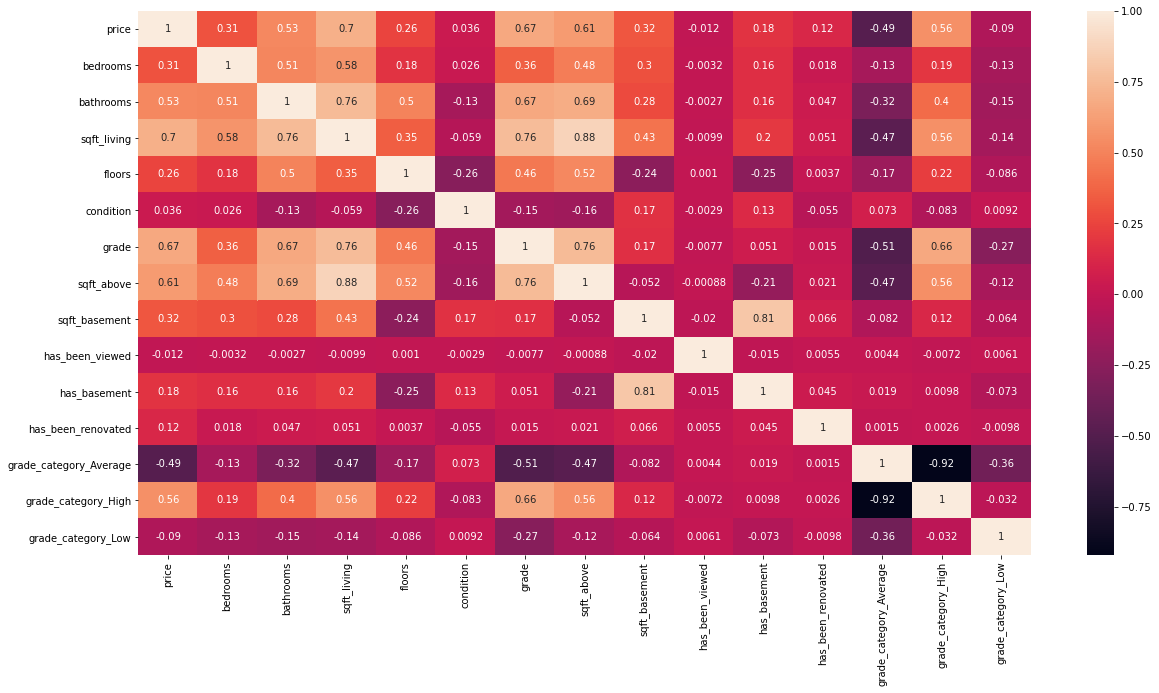

In [250]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(data_OHE.corr(), annot=True)
# grade and sqft_above correlation?
# has_basement and sqft_basement

In [218]:
continuous = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above'] #sqft_basement?
categorical = ['grade_category', 'has_been_viewed', 'has_basement', 'has_been_renovated']

Continuous

In [219]:
data_OHE_cont = data_OHE[continuous]

In [220]:
data_OHE_cont.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,3.409825,7.657915,1788.596842
std,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.650546,1.173200,827.759761
min,7.800000e+04,1.000000,0.500000,370.000000,1.000000,1.000000,3.000000,370.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,3.000000,7.000000,1190.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000,7.000000,1560.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000,8.000000,2210.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,5.000000,13.000000,9410.000000


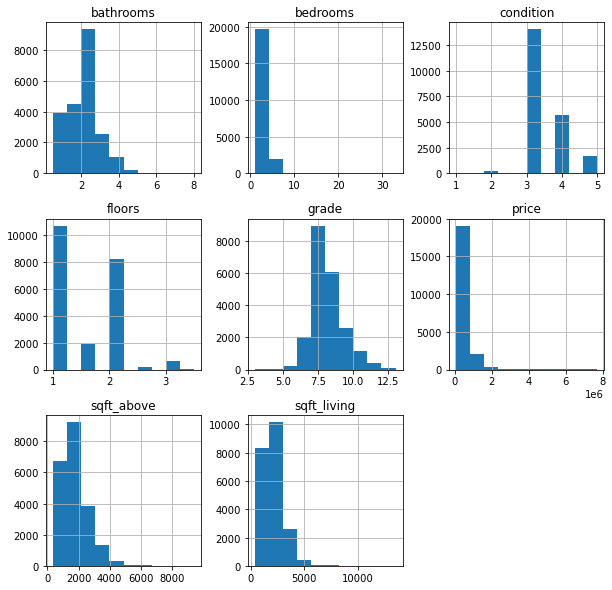

In [221]:
data_OHE_cont.hist(figsize = [10,10])
plt.show()

In [222]:
data_OHE_cont_needs_log = data_OHE_cont.drop(labels='grade', axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5cf016d90>,
      dtype=object)

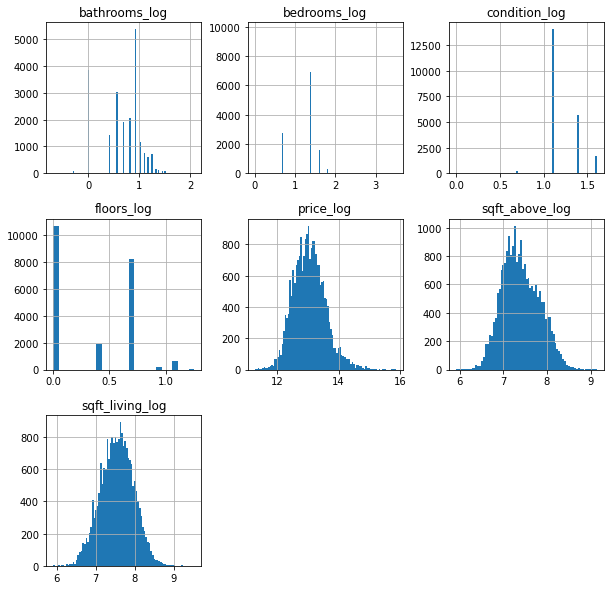

In [223]:
#normalize via log function

log_names = [f'{column}_log' for column in data_OHE_cont_needs_log.columns] #list of column names per attribute

data_OHE_log = np.log(data_OHE_cont_needs_log) #apply log function to all values in ames_cont
data_OHE_log.columns = log_names #label the columns with the log_names above
data_OHE_log.hist(figsize=(10,10), bins='auto') #plot histograms of new log table and values

In [227]:
data_OHE_log.columns

Index(['price_log', 'bedrooms_log', 'bathrooms_log', 'sqft_living_log',
       'floors_log', 'condition_log', 'sqft_above_log'],
      dtype='object')

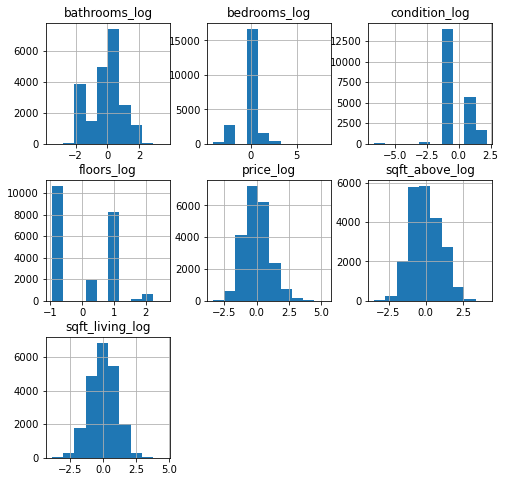

In [228]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_OHE_log.apply(normalize)

features_final.hist(figsize = [8,8]);

In [229]:
features_final.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,floors_log,condition_log,sqft_above_log
0,-0.677290,0.736226,0.608100,0.385465,1.006831,0.973636,0.747022
1,0.286985,-0.279718,-0.300669,-0.363952,1.006831,-0.613360,-1.094699
2,-0.569388,-4.159448,-0.693428,-2.162710,2.157851,-0.613360,-1.783558
3,0.372934,0.736226,0.608100,0.644346,-0.960852,-0.613360,1.004115
4,-0.706735,-0.279718,0.039555,-0.989699,-0.960852,2.204605,-0.618647


Categorical

In [233]:
data_preprocessed = pd.concat([data_OHE, features_final], axis=1)

In [235]:
data_preprocessed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'has_been_viewed',
       'has_basement', 'has_been_renovated', 'grade_category_Average',
       'grade_category_High', 'grade_category_Low', 'price_log',
       'bedrooms_log', 'bathrooms_log', 'sqft_living_log', 'floors_log',
       'condition_log', 'sqft_above_log'],
      dtype='object')

In [240]:
data_preprocessed = data_preprocessed.drop(labels=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above'], axis=1)

KeyError: "['price' 'bedrooms' 'bathrooms' 'sqft_living' 'floors' 'condition'\n 'sqft_above'] not found in axis"

In [242]:
data_preprocessed.columns

Index(['grade', 'sqft_basement', 'has_been_viewed', 'has_basement',
       'has_been_renovated', 'grade_category_Average', 'grade_category_High',
       'grade_category_Low', 'price_log', 'bedrooms_log', 'bathrooms_log',
       'sqft_living_log', 'floors_log', 'condition_log', 'sqft_above_log'],
      dtype='object')

In [243]:
# Define X and y
X_cols = [c for c in data_preprocessed.columns.to_list() if c not in ['price_log']]

X = data_preprocessed[X_cols]
y = data_preprocessed['price_log']

In [244]:
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [245]:
# Instantiate a scaler
scaler = StandardScaler()

In [246]:
# Train our scaler on training data, then fit to testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
# Instantiate a linear regression model
lr = LinearRegression()

In [248]:
# Fit our model on our scaled data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [249]:
# Evaluate
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}") #can account for X amount of variance
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}") 
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_train, y_train_pred))}") #about X amount off in predicting price
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, y_test_pred))}") #about X amount off in predicting price
# Slightly Underfit

Training Scores:
R2: 0.58632600029787
Mean Absolute Error: 0.5089301055496797
Root Mean Squared Error: 0.71339337363735
---
Testing Scores:
R2: 0.5986846987812781
Mean Absolute Error: 0.516821486419346
Root Mean Squared Error: 0.7189029742735427
